In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import f1_score

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer






from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
plt.style.use('fivethirtyeight')

In [2]:
best_features_VC = [  'Weekend_binary','Region_dummies_3', 'Region_dummies_1','VisitorType_dummies_New_Visitor', 
        'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s',
                      'average_administrative_duration_skew_s',
                      'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']


best_features_GB = ['Browser_dummies_2', 'TrafficType_dummies_8', 'Region_dummies_2', 'season_dummies_Spring', 'OperatingSystems_dummies_2', 'Region_dummies_3', 'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']
RF_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
                    'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor',
                    'VisitorType_dummies_Returning_Visitor',
                    'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
                    'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
                    'TrafficType_dummies_2', 'season_dummies_Fall',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']

SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']

best_features_dt = [  'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s' ,'VisitorType_dummies_New_Visitor',
 'Weekend_binary']


best_features_spsa = ['average_BounceRates/ExitRates_skew_s', 'season_dummies_Fall',
       'PageValues_skew_s', 'VisitorType_dummies_New_Visitor',
       'TrafficType_dummies_7', 'average_administrative_duration_skew_s']


#### setting up the votingclassifer

In [4]:
clf1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=4, min_samples_split=10,
                                       min_samples_leaf=1, subsample=0.8 , random_state=123,
                                      )

clf2 =BalancedRandomForestClassifier(max_depth =  7 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)

clf3 = SVC(C=1, break_ties=False, cache_size=200,
           class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
           gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=123,
           shrinking=True, tol=0.001,
           verbose=False)


eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')


In [6]:
# load dataset
import pandas
from scaled_data import *
X,y = clean_data()


###  Setting up the multi evaluation code:

In [7]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE


from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 123
# prepare models
models = []
models.append(('LogisticRegression', best_features_spsa,LogisticRegression( max_iter = 2000,random_state=123 , C=1.0, dual=False)))
models.append(('NaiveBayes',best_features_spsa, BernoulliNB()))
models.append(('GradientBoostingClassifier',best_features_GB, GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,
                    max_depth=4, min_samples_split=10,
                    min_samples_leaf=1, subsample=0.8 , random_state=123)))
models.append(('RandomForestClassifier',RF_best_features, BalancedRandomForestClassifier(max_depth =  7 , 
                    min_samples_split = 6,min_samples_leaf =1  ,
                    n_estimators = 1750 ,random_state=123)))
models.append(('DecisionTreeClassifier',best_features_dt ,DecisionTreeClassifier(max_depth=5,min_samples_split=40)))
models.append(('VotingClassifier',best_features_VC , VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')))
models.append(('SVM',SVC_best_features, SVC(C=1, break_ties=False, cache_size=200,
                          class_weight=None, coef0=0.0,decision_function_shape='ovr',
                          degree=3,gamma=1, kernel='linear',max_iter=-1, probability=True
                          , random_state=123,shrinking=True, tol=0.001,verbose=False)))



### Running  cross_val_score with kfold in a for loop and save the results to a csv
##### For each model :
- evaluate each model in turn
- the code saves the f1  & AUC and accuracy  score
- saves the model Hyperparameters
- saves the model  used features 

In [9]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# evaluate each model in turn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedKFold

results_accuracy = []
results_f1 = []
results_auc = []
names = []
scoring_accuracy = 'accuracy'
scoring_f1 = 'f1'
scoring_auc =  make_scorer(roc_auc_score)
best_features = []
f1 = []
auc = []
f1_bias = []
auc_bias = []
f1_variance = []
auc_variance = []

accuracy_bias = []
accuracy_variance = []


model_hyper = []
summary = []

data = pd.DataFrame([])
for name, best_feature,model in models:
    X_data = X.copy() #making our X columns

    best_features =[best_feature]

    X_models = X_data[best_feature]
    X_model = X_models.values
#getting the values of our y:
     # target
    y_model = y.values.ravel()



#Splitting data test&train 
    X_train, X_test, y_train, y_test= train_test_split(X_model, y_model , test_size=0.25, random_state=8)

    

    sm =SMOTE(k_neighbors=4,random_state=123)
    X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)



   
    kfold = RepeatedKFold(n_splits=10, random_state=seed)
    cv_results_accuracy = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv=kfold, scoring=scoring_accuracy,n_jobs=-2)
    cv_results_f1 = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv=kfold, scoring=scoring_f1,n_jobs=-2)
    cv_results_auc = model_selection.cross_val_score(model,X_train_bal, y_train_bal, cv=kfold, scoring=scoring_auc,n_jobs=-2)
    model_hyper=str(model).replace('\n',"").replace(" ","")
        
    results_accuracy.append(cv_results_accuracy)
    results_f1.append(cv_results_f1)
    results_auc.append(cv_results_auc)
    
    accuracy_bias=cv_results_accuracy.mean()
    accuracy_variance=cv_results_accuracy.std()
    f1_bias=cv_results_f1.mean()
    f1_variance=cv_results_f1.std()
    auc_bias=cv_results_auc.mean()
    auc_variance=cv_results_auc.std()
    
    names.append(name)
        
    summary_m = "[%s] model bias  (f1-score) %0.5f (variance %0.5f) | (AUC-score) %0.5f (variance %0.5f)"% (name,cv_results_f1.mean(), cv_results_f1.std(), 
                                                                                                            cv_results_auc.mean(), cv_results_auc.std())
    summary.append(summary_m )  
                                                                                                           
    data = data.append(pd.DataFrame({'model': name, 'Hyperparameters': model_hyper, 'f1_score': [cv_results_f1], 
                                     'model_bias_f1-score': f1_bias,'model_bias_f1_variance': f1_variance,
                                     'AUC_score': [cv_results_auc],'model_bias_AUC_score': auc_bias,'model_bias_AUC_variance': auc_variance ,
                     'accuracy_score': [cv_results_accuracy], 'model_bias_accuracy_score': accuracy_bias,'model bias_accuracy_variance': accuracy_variance,
                                  "summary":summary_m ,"features_used" :best_features }  ), ignore_index=True)

    

   

In [12]:
#save to csv
#data.to_csv("eval_testv2.csv")
df["model bias_accuracy_variance"][0]

0.009107762605026958

In [24]:
df= pd.read_csv("eval_testv2.csv")

for i in range(0, len( df.index)):
    display(Markdown( " __{} | (Accuracy-score) {} (variance {})__<br>".format(df.summary[i], df.model_bias_accuracy_score[i].round(5), df["model bias_accuracy_variance"][i].round(5))) )
    display(Markdown( " ---")) 

 __[LogisticRegression] model bias  (f1-score) 0.84182 (variance 0.00936) | (AUC-score) 0.84408 (variance 0.00904) | (Accuracy-score) 0.8441 (variance 0.00911)__<br>

 ---

 __[NaiveBayes] model bias  (f1-score) 0.84613 (variance 0.00930) | (AUC-score) 0.84755 (variance 0.00899) | (Accuracy-score) 0.84759 (variance 0.00901)__<br>

 ---

 __[GradientBoostingClassifier] model bias  (f1-score) 0.91239 (variance 0.00648) | (AUC-score) 0.91107 (variance 0.00665) | (Accuracy-score) 0.91108 (variance 0.00661)__<br>

 ---

 __[RandomForestClassifier] model bias  (f1-score) 0.88375 (variance 0.00861) | (AUC-score) 0.88384 (variance 0.00869) | (Accuracy-score) 0.88387 (variance 0.00868)__<br>

 ---

 __[DecisionTreeClassifier] model bias  (f1-score) 0.84404 (variance 0.01002) | (AUC-score) 0.85047 (variance 0.00925) | (Accuracy-score) 0.85051 (variance 0.0094)__<br>

 ---

 __[VotingClassifier] model bias  (f1-score) 0.86095 (variance 0.00903) | (AUC-score) 0.86428 (variance 0.00870) | (Accuracy-score) 0.86431 (variance 0.0088)__<br>

 ---

 __[SVM] model bias  (f1-score) 0.84588 (variance 0.00957) | (AUC-score) 0.85116 (variance 0.00917) | (Accuracy-score) 0.85119 (variance 0.00934)__<br>

 ---

In [51]:


#https://stackoverflow.com/questions/35133317/numpy-save-some-arrays-at-once
try:
    import cPickle as pickle
except:
    import pickle
import numpy as np

#save the arrays to pickle

#with open('AlgorithmComparison_.pkl', 'wb') as outfile:
#    pickle.dump(results_accuracy, outfile, pickle.HIGHEST_PROTOCOL)

with open('AlgorithmComparison_accuracy.pkl', 'rb') as infile:
    result_accuracy_pickle = pickle.load(infile)

In [56]:




try:
    import cPickle as pickle
except:
    import pickle
import numpy as np

with open('AlgorithmComparison_accuracy.pkl', 'rb') as infile:
    result_accuracy_pickle = pickle.load(infile)
with open('AlgorithmComparison_F1.pkl', 'rb') as infile:
    result_f1_pickle = pickle.load(infile)

with open('AlgorithmComparison_AUC.pkl', 'rb') as infile:
    result_auc_pickle = pickle.load(infile)

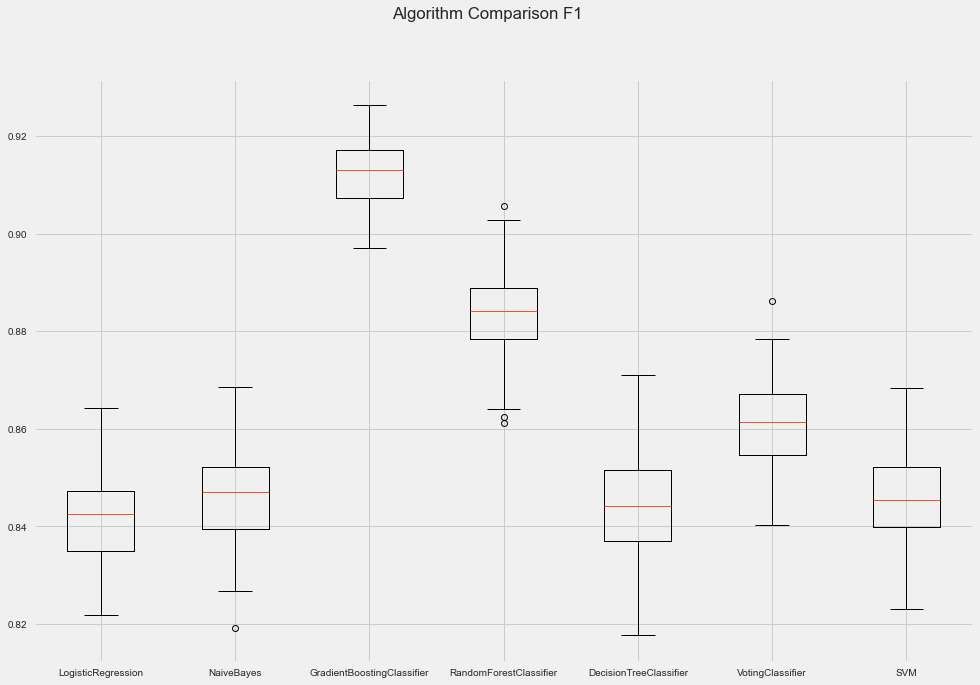

In [55]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison F1')
ax = fig.add_subplot(111)
plt.boxplot( result_f1_pickle)
ax.set_xticklabels(df.model)
plt.show()
from matplotlib import pyplot as plt

#plt.savefig('AlgorithmComparison_F1',dpi=(250), bbox_inches='tight')
  # save the figure to file
#plt.close(fig) 


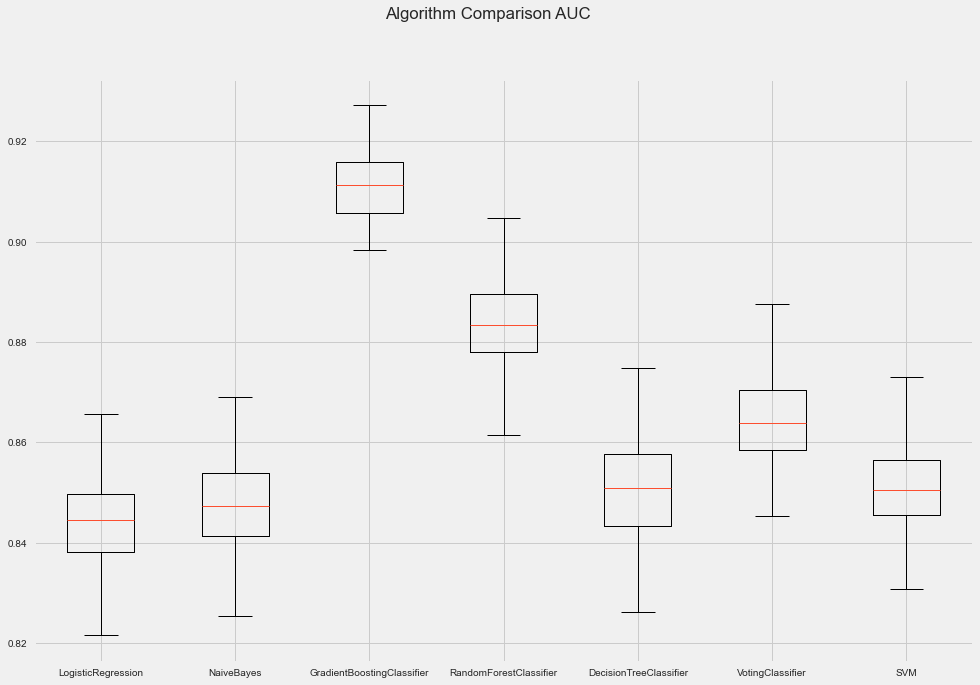

In [60]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison AUC')
ax = fig.add_subplot(111)
plt.boxplot(result_auc_pickle )
ax.set_xticklabels(df.model)
# save the figure to file
#plt.savefig('AlgorithmComparison_AUC',dpi=(250), bbox_inches='tight')

#plt.close(fig) 
plt.show()

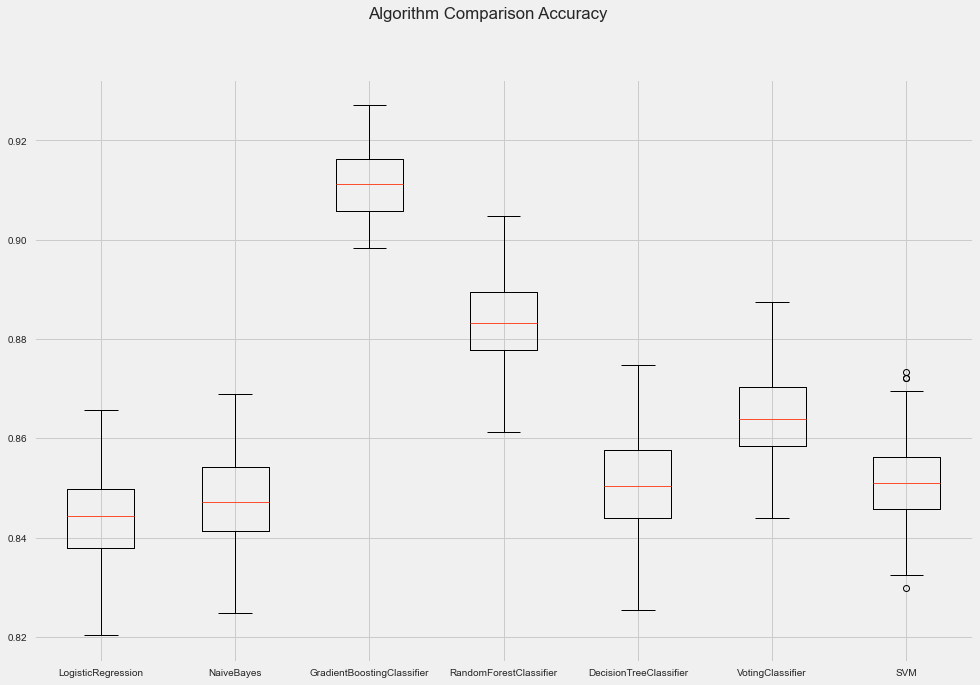

In [59]:

# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(result_accuracy_pickle )
ax.set_xticklabels(df.model)
# save the figure to file

#plt.savefig('AlgorithmComparison_accuracy',dpi=(250), bbox_inches='tight')
#plt.close(fig) 
plt.show()